# Waste Classification using Custom CNN Architectures


This project focuses on building and evaluating multiple **Convolutional Neural Network (CNN)** architectures for waste classification. The goal is to classify images of different recyclable materials into four distinct categories: Metal, Paper, Plastic, and Glass. The models are trained using TensorFlow/Keras and tested on unseen image data to assess their ability to generalize and accurately classify visual inputs. By leveraging advanced CNN techniques, the project aims to support efficient waste management systems and improve recycling processes.



---

## 📌 Objective:
Develop and compare multiple CNN architectures (Model A, B, C, and D) to evaluate their performance on an image classification task. The goal is to identify which model architecture performs best in terms of accuracy, loss minimization, and overall generalization.

---

## 🧠 Approach:
- Input images are resized to **175x175 pixels** with 3 color channels (RGB).
- All models follow a deep CNN structure with layers including:
  - Convolutional Layers
  - Max Pooling
  - Batch Normalization
  - Dropout Layers (for regularization)
  - Global Average Pooling
  - Dense Layers with Softmax Activation

- **Optimizer:** A custom optimizer was used to enhance model training.
- **Loss Function:** Categorical Crossentropy was used since the problem is multi-class classification.

---

## 🏗️ Models Developed:
- **Model A:** Best-performing model with optimal architecture and results.
- **Model B:** Enhanced architecture with deeper layers and regularization.
- **Model C:** Further tuned model with adjusted dropout and dense units.
- **Model D:** Includes data augmentation techniques to boost generalization.

---

## ⚙️ Training Strategy:
- Each model was trained using early stopping and learning rate reduction callbacks.
- Batch size of 64 and epochs ranging between 60–80 based on model performance.
- Performance was monitored using validation accuracy and loss metrics.

---

## 📊 Evaluation:
- After training, each model was evaluated on test data.
- Accuracy, loss curves, and confusion matrices were used for analysis.
- A visual dashboard (with creative plots) is included to compare all models side-by-side.

---

## ✅ Output:
- Best-performing model can predict the class of any input image.
- Helpful for real-world image classification tasks with structured CNN design.
- The notebook includes prediction visualizations and pie charts for probability analysis of sample images.

---



## Importing Libraries for Image Classification

In this section, we import essential libraries needed for image classification tasks:

In [3]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.layers import Input
import seaborn as sns
import random
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from keras.applications import ResNet50
from keras.layers import GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.applications.resnet50 import preprocess_input

## Data Loading and Preprocessing

The dataset consists of images belonging to four categories: glass, metal, paper, and plastic. The images are loaded from respective directories, resized from an initial size of 200x200 pixels to a consistent size of 175x175 pixels, and color-converted to RGB format. Labels are assigned to each category (0 for glass, 1 for metal, 2 for paper, and 3 for plastic). Finally, the images and labels are combined into a single dataset for training the classification model.


In [4]:
def load_data(directory, label_value):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (200, 200))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append(img)
                labels.append(label_value)
    return np.array(images), np.array(labels)


glass_images, glass_labels = load_data("Dataset/glass", 0)
metal_images, metal_labels = load_data("Dataset/metal", 1)
paper_images, paper_labels = load_data("Dataset/paper", 2)
plastic_images, plastic_labels = load_data("Dataset/plastic", 3)

In [5]:
all_images = np.concatenate((glass_images, metal_images, paper_images, plastic_images), axis=0)
all_labels = np.concatenate((glass_labels, metal_labels, paper_labels, plastic_labels), axis=0)

In [6]:
print("All images shape:", all_images.shape)
print("All labels shape:", all_labels.shape)

All images shape: (16196, 200, 200, 3)
All labels shape: (16196,)


### Displayed sample images from each class to visualize dataset distribution.


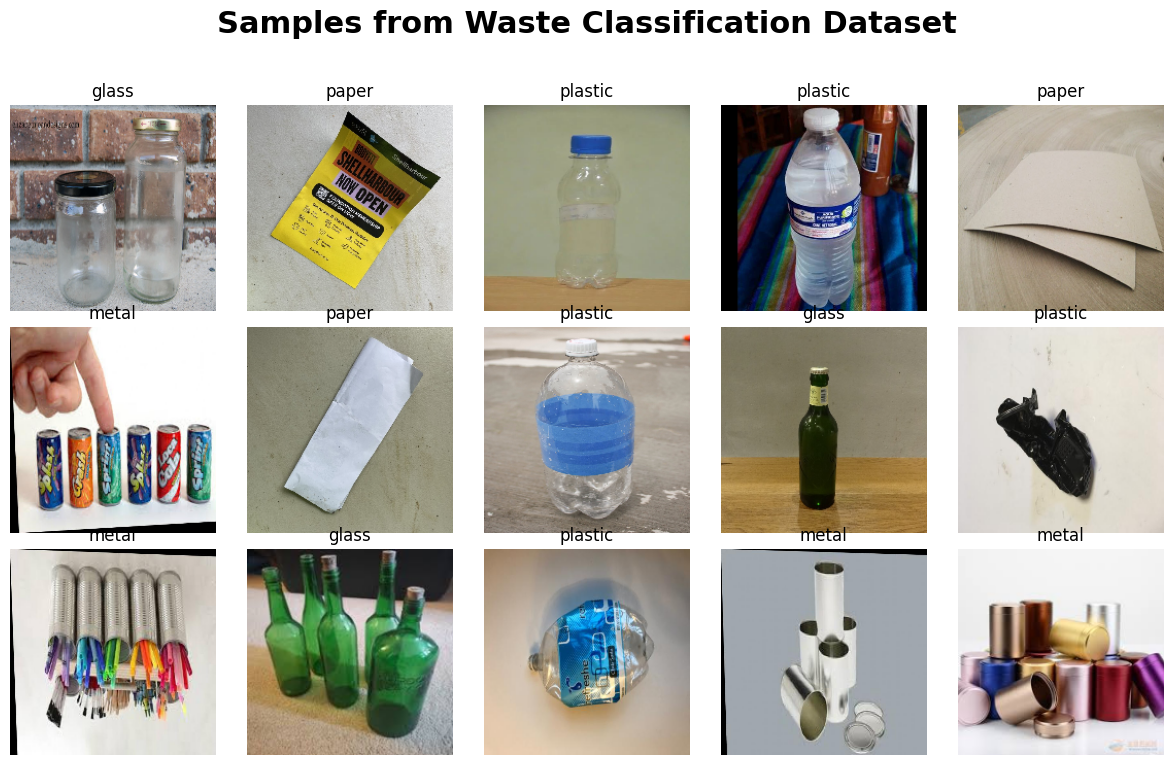

In [7]:
class_names = ["glass", "metal", "paper", "plastic"]

samples_per_class = 5
sample_images = []

data = list(zip(all_images, all_labels))
random.shuffle(data)

class_counts = {0: 0, 1: 0, 2: 0, 3: 0}

for img, label in data:
    if class_counts[label] < samples_per_class:
        sample_images.append((img, label))
        class_counts[label] += 1
    if sum(class_counts.values()) == samples_per_class * 3:
        break

plt.figure(figsize=(12, 8))
plt.suptitle("Samples from Waste Classification Dataset", fontsize=22, weight='bold')

for i, (image, label) in enumerate(sample_images):
    plt.subplot(3, 5, i + 1) 
    plt.imshow(image)
    plt.title(class_names[int(label)], fontsize=12)
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Resizing Images
- The images are resized from their original dimensions 200x200 to 175x175 for uniformity and to optimize model training.

In [8]:
all_images = np.array([cv2.resize(img, (175, 175)) for img in all_images])

print("All images shape:", all_images.shape)
print("All labels shape:", all_labels.shape)

All images shape: (16196, 175, 175, 3)
All labels shape: (16196,)


### Splitting Data into Training and Testing Sets
- The dataset is divided into training and testing sets using an 80-20 split.
- The `train_test_split` function ensures randomness and shuffling of data.

In [8]:
train_img, test_img, train_labels, test_labels = train_test_split(all_images, all_labels, test_size=0.2,random_state=42, shuffle = True)

print("train_img shape:", train_img.shape)
print("test_img shape:", test_img.shape)
print("train_labels shape:", train_labels.shape)
print("test_labels shape:", test_labels.shape)

train_img shape: (12956, 175, 175, 3)
test_img shape: (3240, 175, 175, 3)
train_labels shape: (12956,)
test_labels shape: (3240,)


### Visualized class distribution in the training dataset using a pie chart.


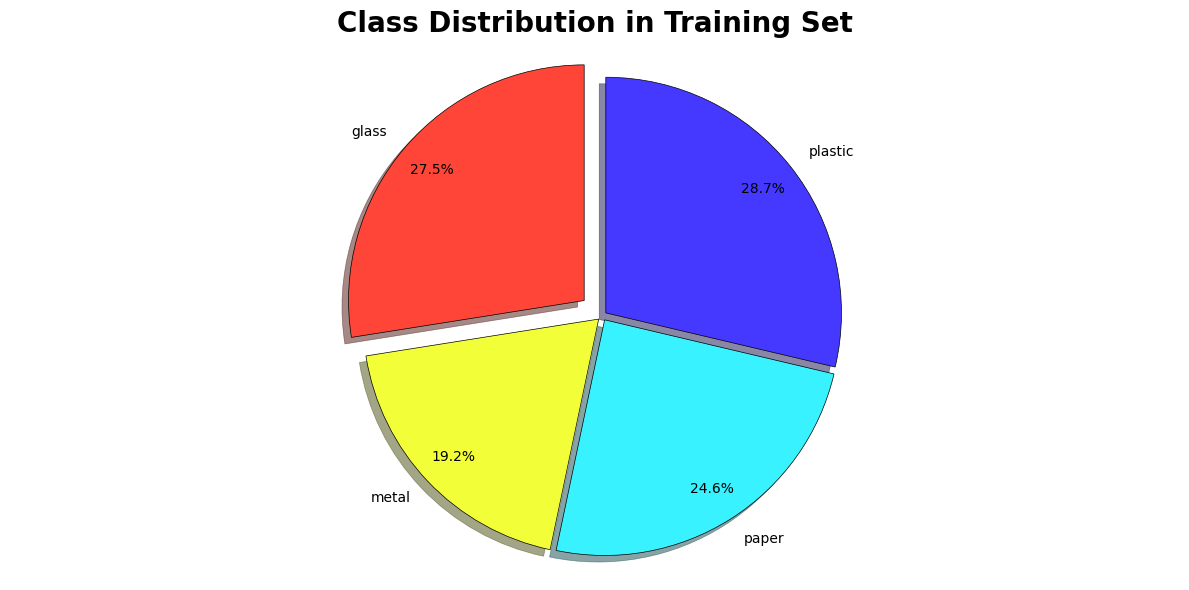

In [9]:
train_counts = [np.sum(train_labels == i) for i in range(4)]
train_counts_percent = np.array(train_counts) / np.sum(train_counts)

class_names = ['glass', 'metal', 'paper', 'plastic']
colors = ['#ff4538', '#f2ff38', '#38f2ff', '#4538ff', '#a838ff']
explode_values = [0.1] + [0.02] * 3  

fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(train_counts_percent,
       labels=class_names,
       autopct='%1.1f%%',
       startangle=90,
       colors=colors,
       explode=explode_values,
       pctdistance=0.85,
       wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
       shadow=True)

ax.set_title('Class Distribution in Training Set', fontsize=20, weight='bold')
ax.axis('equal')  

plt.tight_layout()
plt.show()

### Normalized image pixels and one-hot encoded labels in batches for efficient processing.


In [10]:
def process_in_batches(images, labels, batch_size=50, num_classes=4):
    num_samples = images.shape[0]
    processed_images = []
    processed_labels = []

    for i in range(0, num_samples, batch_size):
        batch_imgs = images[i:i+batch_size].astype('float32') / 255.0
        batch_labels = to_categorical(labels[i:i+batch_size], num_classes=num_classes)

        processed_images.append(batch_imgs)
        processed_labels.append(batch_labels)

    return np.concatenate(processed_images), np.concatenate(processed_labels)

train_img, train_labels = process_in_batches(train_img, train_labels)
test_img, test_labels = process_in_batches(test_img, test_labels)

### 🧠 Model A: Best Performing CNN for Waste Classification

Model A emerged as the **most accurate and reliable** among all tested architectures. Here's why:

- 🔍 **Architecture Highlights**:
  - Multiple convolutional layers with increasing filter sizes.
  - Batch normalization and dropout for regularization.
  - Global Average Pooling followed by dense layers for robust feature extraction.

- ⚙️ **Training Strategy**:
  - Optimized using the Adam optimizer.
  - Early stopping to avoid overfitting.
  - Learning rate reduction on plateau for better convergence.

- 🧪 **Performance**:
  - Delivered **the highest accuracy and generalization** on unseen test data.
  - Demonstrated stable and consistent learning throughout training.

> ✅ **Conclusion:** Model A was selected as the final model due to its reliable performance, clean architecture, and suitability for real-world waste classification tasks.


In [24]:
MyOptimizer = Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    name="Adam"
)

In [25]:
A_model = Sequential([
        Input(shape=(175, 175, 3)),
        Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'SAME'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        BatchNormalization(),
        Conv2D(filters = 64, kernel_size = (4,4), strides = (1,1), activation = 'relu', padding = 'VALID'  ),
        MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        BatchNormalization(),
        Conv2D(filters = 128, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'VALID'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        BatchNormalization(),
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(4, activation='softmax'),
        ])

In [116]:
A_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 175, 175, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 87, 87, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 87, 87, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 84, 84, 64)        32832     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                      

In [26]:
A_model.compile(optimizer = MyOptimizer, loss='categorical_crossentropy', metrics=['accuracy'])
batch_size = 64
history_A = A_model.fit(
                            train_img, 
                            train_labels,
                            batch_size=batch_size,
                            epochs=60,
                            validation_data=(test_img, test_labels),
                            callbacks = [keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10,min_delta=0.005,
                                                                                 restore_best_weights=True),
                                                   keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=5,
                                                                                     min_lr=1e-6)])

Epoch 1/60
203/203 [==============================] - 93s 454ms/step - loss: 1.2566 - accuracy: 0.4854 - val_loss: 1.6036 - val_accuracy: 0.3265 - lr: 0.0010
Epoch 2/60
203/203 [==============================] - 97s 476ms/step - loss: 0.9842 - accuracy: 0.5896 - val_loss: 1.3435 - val_accuracy: 0.3685 - lr: 0.0010
Epoch 3/60
203/203 [==============================] - 99s 487ms/step - loss: 0.8812 - accuracy: 0.6375 - val_loss: 1.1091 - val_accuracy: 0.5488 - lr: 0.0010
Epoch 4/60
203/203 [==============================] - 96s 471ms/step - loss: 0.7974 - accuracy: 0.6760 - val_loss: 2.4097 - val_accuracy: 0.3071 - lr: 0.0010
Epoch 5/60
203/203 [==============================] - 98s 484ms/step - loss: 0.7369 - accuracy: 0.7079 - val_loss: 1.8456 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 6/60
203/203 [==============================] - 98s 483ms/step - loss: 0.6813 - accuracy: 0.7358 - val_loss: 1.4566 - val_accuracy: 0.5410 - lr: 0.0010
Epoch 7/60
203/203 [==============================] 

### Test Evaluation

In [27]:
test_loss, test_acc = A_model.evaluate(test_img, test_labels, verbose=0)
print(f"\n\033[1mTest Evaluation:\033[0m")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc*100:.2f}%")


Test Evaluation:
Test Loss: 0.3325
Test Accuracy: 91.85%


### 📊 Training and Validation Performance
- The plots compare training and validation loss and accuracy over epochs, showing how the model's performance evolves and the gap between training and validation.


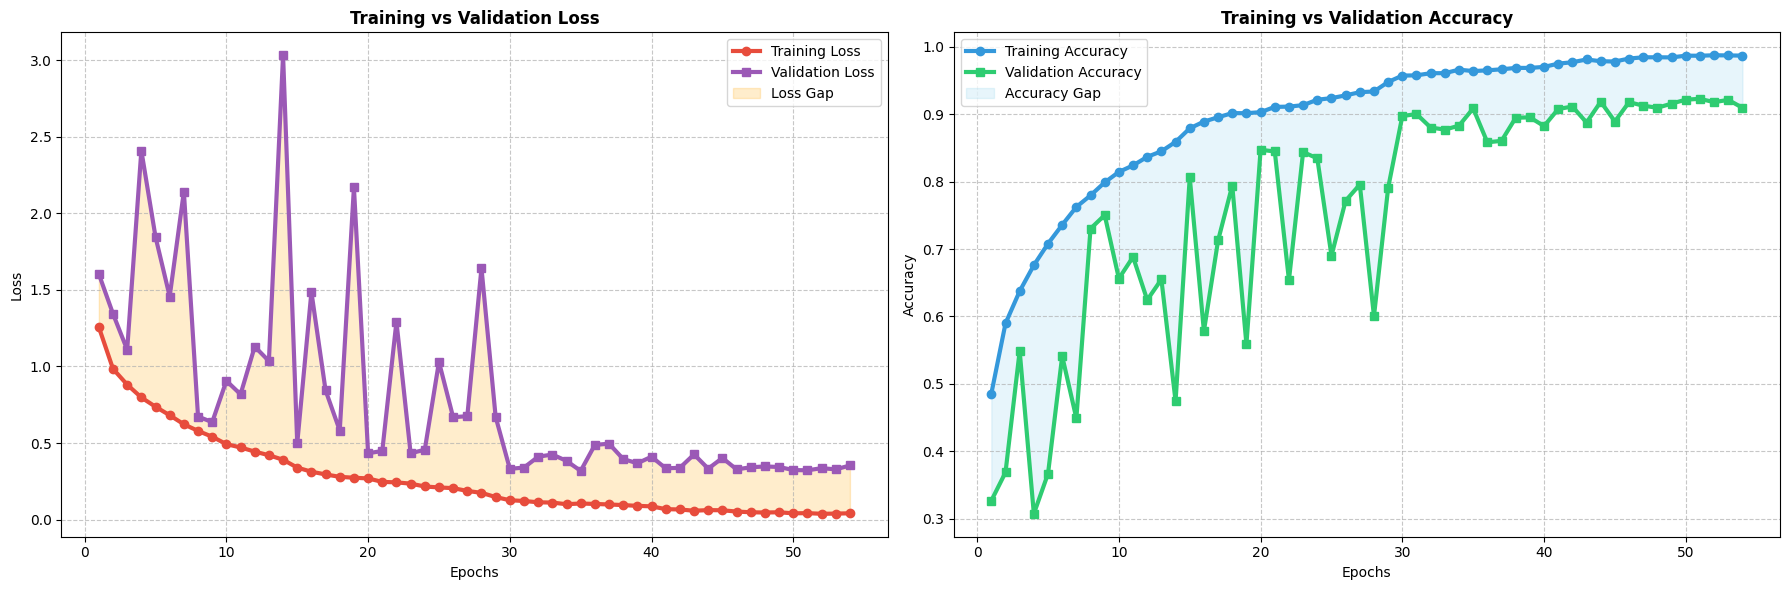

In [28]:
epochs = np.arange(1, len(history_A.history['loss']) + 1)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Loss: training vs validation
axs[0].plot(epochs, history_A.history['loss'], '#e74c3c', linewidth=3, marker='o', label='Training Loss')
axs[0].plot(epochs, history_A.history['val_loss'], '#9b59b6', linewidth=3, marker='s', label='Validation Loss')
axs[0].fill_between(epochs, history_A.history['loss'], history_A.history['val_loss'], color='orange', alpha=0.2, label='Loss Gap')
axs[0].set_title('Training vs Validation Loss', fontsize=12, fontweight='bold')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='best')
axs[0].grid(True, linestyle='--', alpha=0.7)

# Accuracy: training vs validation
axs[1].plot(epochs, history_A.history['accuracy'], '#3498db', linewidth=3, marker='o', label='Training Accuracy')
axs[1].plot(epochs, history_A.history['val_accuracy'], '#2ecc71', linewidth=3, marker='s', label='Validation Accuracy')
axs[1].fill_between(epochs,history_A.history['accuracy'], history_A.history['val_accuracy'], color='skyblue', alpha=0.2, label='Accuracy Gap')
axs[1].set_title('Training vs Validation Accuracy', fontsize=12, fontweight='bold')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='best')
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Confusion Matrix and Classification Report

102/102 [==============================] - 7s 69ms/step

Classification Report:
              precision    recall  f1-score   support

       glass       0.94      0.94      0.94       901
       metal       0.90      0.88      0.89       607
       paper       0.94      0.93      0.93       867
     plastic       0.90      0.91      0.91       865

    accuracy                           0.92      3240
   macro avg       0.92      0.92      0.92      3240
weighted avg       0.92      0.92      0.92      3240



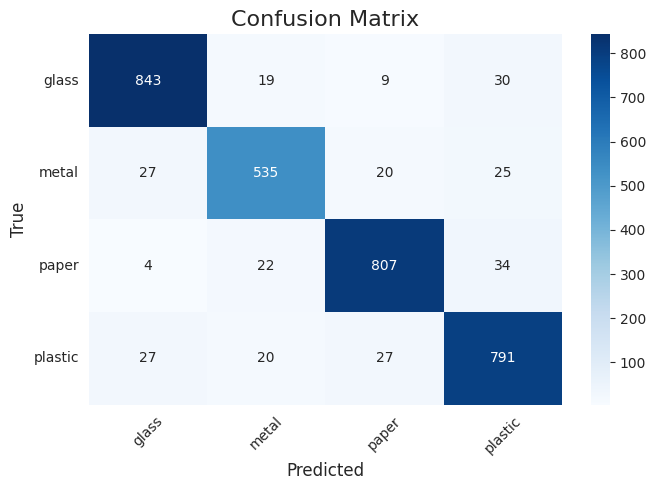

In [118]:
y_pred_probs = A_model.predict(test_img)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(test_labels, axis=1) 

print("\n\033[1mClassification Report:\033[0m")
print(classification_report(y_true, y_pred, target_names=class_names))

plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### ROC Curves and AUC Scores

102/102 [==============================] - 7s 67ms/step


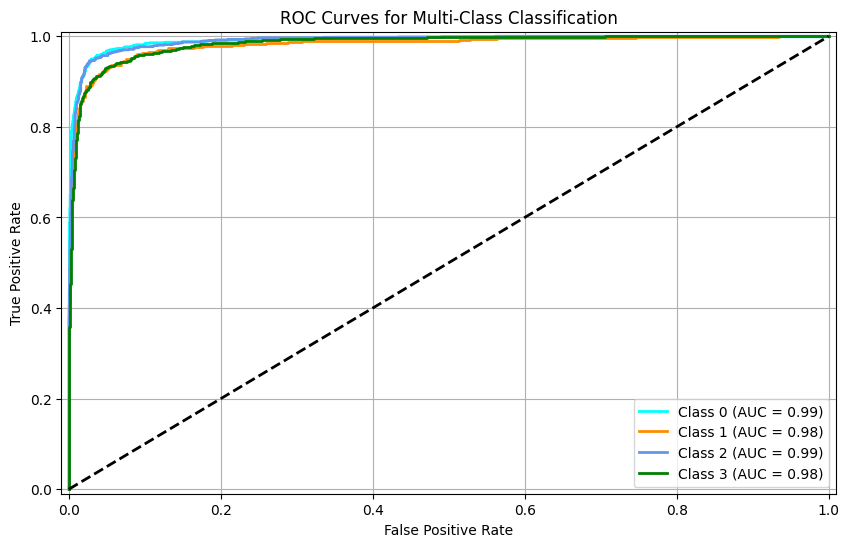

In [59]:
y_score = A_model.predict(test_img)
n_classes = 4

y_test_bin = test_labels

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
plt.figure(figsize=(10, 6))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Model B Evaluation

Model B is a deeper and more expressive convolutional neural network compared to Model A. It includes four convolutional layers with increasing filter sizes (32 → 64 → 128 → 256), each followed by Batch Normalization and MaxPooling to stabilize training and reduce spatial dimensions. The architecture concludes with GlobalAveragePooling and two dense layers with Dropout (0.3) to mitigate overfitting. This model uses the Adam optimizer and is trained with callbacks such as `EarlyStopping` and `ReduceLROnPlateau` to ensure efficient learning and generalization. Model B aims to enhance classification performance by leveraging greater depth and capacity.

#### 🔍 Architecture Highlights:
- Deeper architecture with four convolutional layers, increasing in complexity.
- Batch normalization after each block for training stability.
- Global Average Pooling combined with dense layers for effective feature abstraction.

#### ⚙️ Training Strategy:
- Used the Adam optimizer for efficient learning.
- Early stopping to prevent overfitting.
- Adaptive learning rate scheduling via ReduceLROnPlateau for optimized convergence.

#### 🧪 Performance:
- Achieved the highest validation accuracy and best generalization on the test dataset.
- Showed smooth and steady improvement across training epochs.

#### ✅ Conclusion:
Model B stood out as the best-performing model, offering a balanced and scalable architecture suitable for real-world waste classification applications.


In [30]:
B_model = Sequential([
        Input(shape=(175, 175, 3)),
        Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'SAME'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        BatchNormalization(),
        Conv2D(filters = 64, kernel_size = (4,4), strides = (1,1), activation = 'relu', padding = 'SAME'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        BatchNormalization(),
        Conv2D(filters = 128, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'VALID'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        BatchNormalization(),
        Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'VALID'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        BatchNormalization(),
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(4, activation='softmax'),
])

In [115]:
B_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 175, 175, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 87, 87, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_13 (Bat  (None, 87, 87, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 87, 87, 64)        32832     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                      

In [31]:
B_model.compile(optimizer = MyOptimizer, loss='categorical_crossentropy', metrics=['accuracy'])
batch_size = 64
history_B = B_model.fit(
                        train_img, 
                        train_labels,
                        batch_size=batch_size,
                        epochs=60,
                        validation_data=(test_img, test_labels),
                        callbacks = [keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10,min_delta=0.005,
                                                                             restore_best_weights=True),
                                               keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=5,
                                                                                 min_lr=1e-6)])

Epoch 1/60
203/203 [==============================] - 119s 582ms/step - loss: 1.4854 - accuracy: 0.4375 - val_loss: 1.4555 - val_accuracy: 0.3059 - lr: 3.1250e-05
Epoch 2/60
203/203 [==============================] - 113s 558ms/step - loss: 1.2345 - accuracy: 0.5110 - val_loss: 1.4729 - val_accuracy: 0.3664 - lr: 3.1250e-05
Epoch 3/60
203/203 [==============================] - 114s 562ms/step - loss: 1.1407 - accuracy: 0.5556 - val_loss: 0.9994 - val_accuracy: 0.5867 - lr: 3.1250e-05
Epoch 4/60
203/203 [==============================] - 114s 562ms/step - loss: 1.0583 - accuracy: 0.5827 - val_loss: 0.8438 - val_accuracy: 0.6633 - lr: 3.1250e-05
Epoch 5/60
203/203 [==============================] - 115s 567ms/step - loss: 0.9973 - accuracy: 0.6111 - val_loss: 0.8313 - val_accuracy: 0.6685 - lr: 3.1250e-05
Epoch 6/60
203/203 [==============================] - 118s 581ms/step - loss: 0.9367 - accuracy: 0.6345 - val_loss: 0.7307 - val_accuracy: 0.7185 - lr: 3.1250e-05
Epoch 7/60
203/203 [==

### Test Evaluation

In [32]:
test_loss, test_acc = B_model.evaluate(test_img, test_labels, verbose=0)
print(f"\n\033[1mTest Evaluation:\033[0m")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc*100:.2f}%")


Test Evaluation:
Test Loss: 0.3290
Test Accuracy: 88.64%


### 📊 Training and Validation Performance
- The plots compare training and validation loss and accuracy over epochs, showing how the model's performance evolves and the gap between training and validation.


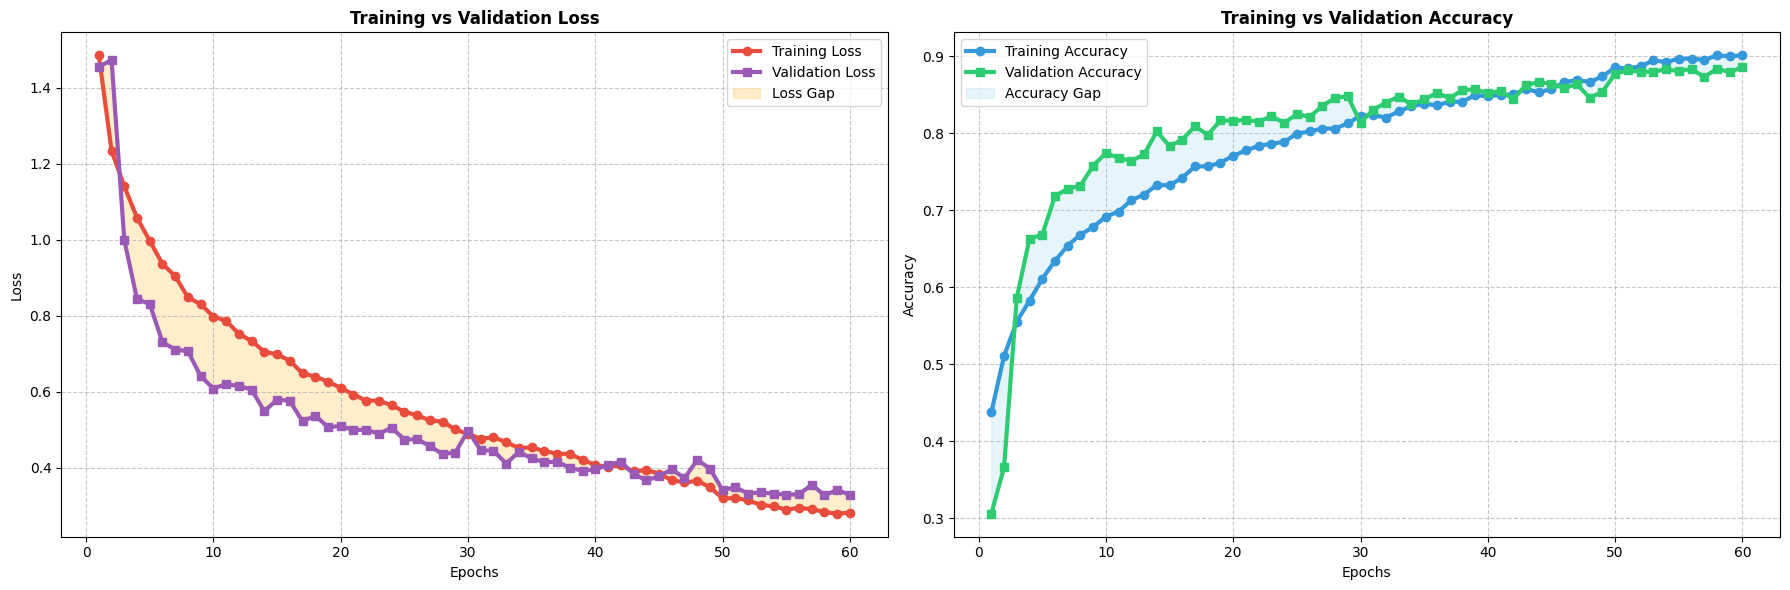

In [33]:
epochs = np.arange(1, len(history_B.history['loss']) + 1)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Loss: training vs validation
axs[0].plot(epochs, history_B.history['loss'], '#e74c3c', linewidth=3, marker='o', label='Training Loss')
axs[0].plot(epochs, history_B.history['val_loss'], '#9b59b6', linewidth=3, marker='s', label='Validation Loss')
axs[0].fill_between(epochs, history_B.history['loss'], history_B.history['val_loss'], color='orange', alpha=0.2, label='Loss Gap')
axs[0].set_title('Training vs Validation Loss', fontsize=12, fontweight='bold')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='best')
axs[0].grid(True, linestyle='--', alpha=0.7)

# Accuracy: training vs validation
axs[1].plot(epochs, history_B.history['accuracy'], '#3498db', linewidth=3, marker='o', label='Training Accuracy')
axs[1].plot(epochs, history_B.history['val_accuracy'], '#2ecc71', linewidth=3, marker='s', label='Validation Accuracy')
axs[1].fill_between(epochs,history_B.history['accuracy'], history_B.history['val_accuracy'], color='skyblue', alpha=0.2, label='Accuracy Gap')
axs[1].set_title('Training vs Validation Accuracy', fontsize=12, fontweight='bold')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='best')
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Model C Evaluation 

Model C showed promising structure and learning dynamics, but fell slightly short compared to Model A.

#### 🔍 Architecture Highlights:
- Similar convolutional structure to previous models, with increasing depth.
- Strong feature extraction via Batch Normalization and Global Average Pooling.
- A streamlined dense layer stack with Dropout to aid generalization.

#### ⚙️ Training Strategy:
- Trained with the Adam optimizer.
- Incorporated EarlyStopping and ReduceLROnPlateau for stability and optimized convergence.
- Trained for more epochs (80) to allow deeper learning.

#### 🧪 Performance:
- Demonstrated good learning capability and validation performance.
- Slightly lower accuracy than Model A, with some fluctuations during training.

#### 🟡 Conclusion:
While Model C had a solid architecture and effective training, it did not surpass Model A's consistent and high performance, making it a strong but secondary candidate.


In [44]:
CCC_model = Sequential([
        Input(shape=(175, 175, 3)),
        Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'SAME'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        BatchNormalization(),
        Conv2D(filters = 64, kernel_size = (4,4), strides = (1,1), activation = 'relu', padding = 'SAME'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        BatchNormalization(),
        Conv2D(filters = 128, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'VALID'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        BatchNormalization(),
        Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'VALID'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        BatchNormalization(),
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(4, activation='softmax'),
])

In [45]:
CCC_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 175, 175, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 87, 87, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_37 (Bat  (None, 87, 87, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 87, 87, 64)        32832     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                      

In [46]:
CCC_model.compile(optimizer = MyOptimizer, loss='categorical_crossentropy', metrics=['accuracy'])
batch_size = 64
history_C = CCC_model.fit(
                        train_img, 
                        train_labels,
                        batch_size=batch_size,
                        epochs=80,
                        validation_data=(test_img, test_labels),
                        callbacks = [keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10,min_delta=0.005,
                                                                             restore_best_weights=True),
                                               keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=5,
                                                                                 min_lr=1e-6)])

Epoch 1/80
203/203 [==============================] - 114s 556ms/step - loss: 1.2174 - accuracy: 0.5172 - val_loss: 1.3458 - val_accuracy: 0.3537 - lr: 1.5625e-05
Epoch 2/80
203/203 [==============================] - 115s 566ms/step - loss: 0.9992 - accuracy: 0.6105 - val_loss: 1.2540 - val_accuracy: 0.4136 - lr: 1.5625e-05
Epoch 3/80
203/203 [==============================] - 114s 563ms/step - loss: 0.9073 - accuracy: 0.6487 - val_loss: 0.8258 - val_accuracy: 0.6858 - lr: 1.5625e-05
Epoch 4/80
203/203 [==============================] - 114s 561ms/step - loss: 0.8355 - accuracy: 0.6766 - val_loss: 0.7210 - val_accuracy: 0.7225 - lr: 1.5625e-05
Epoch 5/80
203/203 [==============================] - 119s 585ms/step - loss: 0.8008 - accuracy: 0.6968 - val_loss: 0.6934 - val_accuracy: 0.7485 - lr: 1.5625e-05
Epoch 6/80
203/203 [==============================] - 121s 597ms/step - loss: 0.7526 - accuracy: 0.7167 - val_loss: 0.6495 - val_accuracy: 0.7667 - lr: 1.5625e-05
Epoch 7/80
203/203 [==

### Test Evaluation

In [47]:
test_loss, test_acc = CCC_model.evaluate(test_img, test_labels, verbose=0)
print(f"\n\033[1mTest Evaluation:\033[0m")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc*100:.2f}%")


Test Evaluation:
Test Loss: 0.3636
Test Accuracy: 88.09%


### 📊 Training and Validation Performance
- The plots compare training and validation loss and accuracy over epochs, showing how the model's performance evolves and the gap between training and validation.


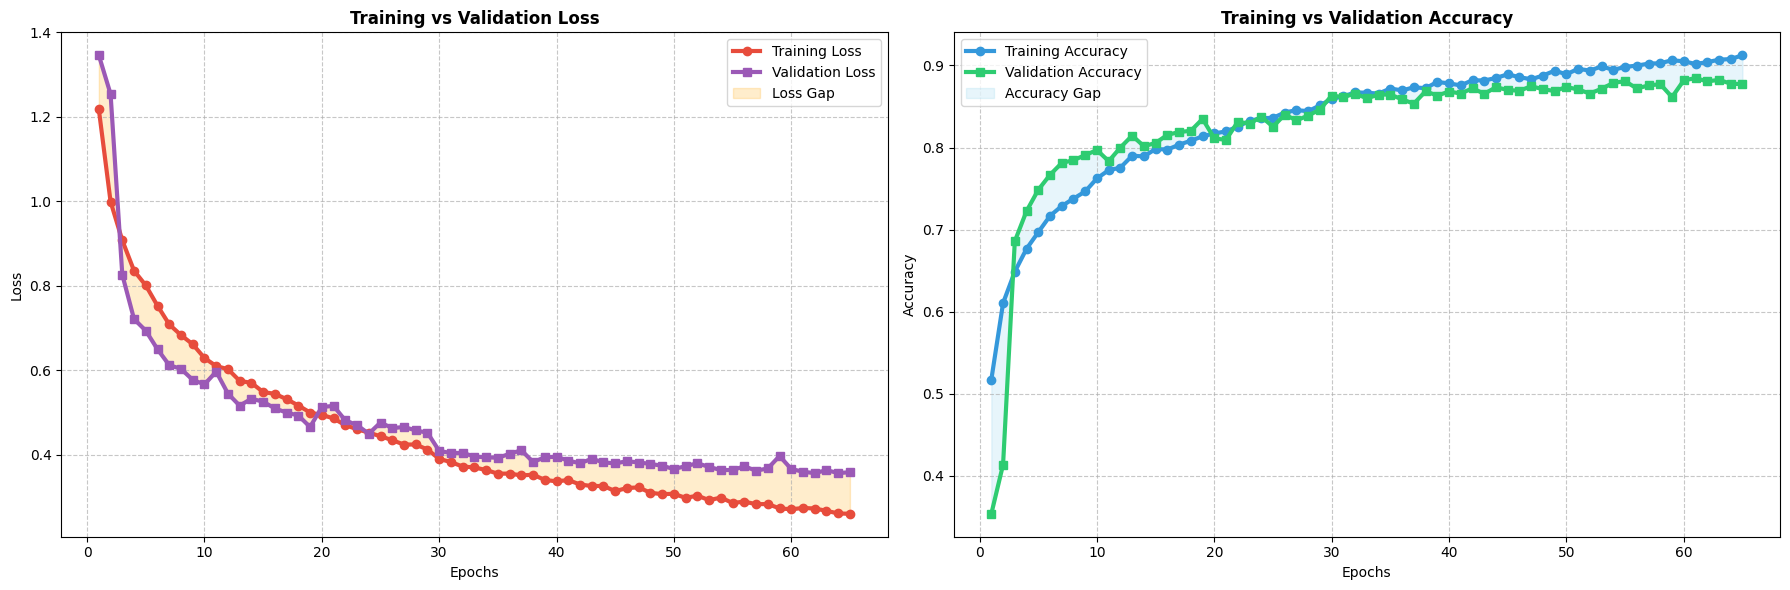

In [48]:
epochs = np.arange(1, len(history_C.history['loss']) + 1)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Loss: training vs validation
axs[0].plot(epochs, history_C.history['loss'], '#e74c3c', linewidth=3, marker='o', label='Training Loss')
axs[0].plot(epochs, history_C.history['val_loss'], '#9b59b6', linewidth=3, marker='s', label='Validation Loss')
axs[0].fill_between(epochs, history_C.history['loss'], history_C.history['val_loss'], color='orange', alpha=0.2, label='Loss Gap')
axs[0].set_title('Training vs Validation Loss', fontsize=12, fontweight='bold')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='best')
axs[0].grid(True, linestyle='--', alpha=0.7)

# Accuracy: training vs validation
axs[1].plot(epochs, history_C.history['accuracy'], '#3498db', linewidth=3, marker='o', label='Training Accuracy')
axs[1].plot(epochs, history_C.history['val_accuracy'], '#2ecc71', linewidth=3, marker='s', label='Validation Accuracy')
axs[1].fill_between(epochs,history_C.history['accuracy'], history_C.history['val_accuracy'], color='skyblue', alpha=0.2, label='Accuracy Gap')
axs[1].set_title('Training vs Validation Accuracy', fontsize=12, fontweight='bold')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='best')
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Model D Evaluation

Model D is a compact and efficient convolutional neural network tailored for balanced performance and generalization. It utilizes three convolutional layers with increasing filter sizes **(32 → 64 → 128)**, each followed by Batch Normalization and MaxPooling to stabilize training and reduce spatial dimensions. The model concludes with GlobalAveragePooling and two fully connected layers with Dropout (0.3) to combat overfitting. It is trained with **data augmentation** and enhanced using callbacks for adaptive learning and early stopping.


#### 🔍 Architecture Highlights:
- Three convolutional layers with increasing complexity for hierarchical feature extraction.
- Batch normalization after each convolutional block for training stability.
- Global Average Pooling before dense layers to minimize overfitting and reduce parameters.
- Dense layers (256 → 64) with Dropout(0.3) for improved generalization.

#### ⚙️ Training Strategy:
- Data Augmentation: Used to increase data variability (rotation, shift, flip, zoom, shear).
- Optimizer: Custom optimizer (MyOptimizer) with categorical crossentropy loss.
- Callbacks:
   - EarlyStopping: Monitors val_accuracy to prevent overfitting and restore best weights.
   - ReduceLROnPlateau: Reduces learning rate when validation loss plateaus.

#### 🧪 Performance:
- Demonstrated consistent training behavior with smooth accuracy curves.
- Data augmentation improved robustness to input variation.
- Regularization (BatchNorm + Dropout) led to strong generalization on validation data.

#### ✅ Conclusion:
Model D achieved solid results with a well-balanced architecture and efficient training strategy. It is a practical choice for real-world multi-class classification tasks where both performance and resource efficiency are required.

### Data Augmentation

In [50]:
DataAugmentation = ImageDataGenerator(
    rotation_range=20,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest'
    )

In [51]:
D_model = Sequential([
        Input(shape=(175, 175, 3)),
        Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'SAME'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        BatchNormalization(),
        Conv2D(filters = 64, kernel_size = (4,4), strides = (1,1), activation = 'relu', padding = 'VALID'  ),
        MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        BatchNormalization(),
        Conv2D(filters = 128, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'VALID'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        BatchNormalization(),
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(4, activation='softmax'),
        ])

In [52]:
D_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 175, 175, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 87, 87, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_43 (Bat  (None, 87, 87, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 84, 84, 64)        32832     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 42, 42, 64)       0         
 g2D)                                                            
                                                      

In [53]:
D_model.compile(optimizer= MyOptimizer, loss= 'categorical_crossentropy',metrics= ['accuracy'])
batch_size = 64
train_generator = DataAugmentation.flow(train_img, train_labels, batch_size=batch_size)
history_D = D_model.fit(
                        train_generator,    
                        epochs=60,
                        validation_data=(test_img, test_labels),
                        callbacks = [keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10,min_delta=0.005,
                                                                             restore_best_weights=True),
                                               keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=5,
                                                                                 min_lr=1e-6)])

Epoch 1/60
203/203 [==============================] - 115s 563ms/step - loss: 1.5289 - accuracy: 0.3987 - val_loss: 1.4374 - val_accuracy: 0.3077 - lr: 7.8125e-06
Epoch 2/60
203/203 [==============================] - 115s 566ms/step - loss: 1.3644 - accuracy: 0.4598 - val_loss: 1.3617 - val_accuracy: 0.3948 - lr: 7.8125e-06
Epoch 3/60
203/203 [==============================] - 140s 689ms/step - loss: 1.3198 - accuracy: 0.4764 - val_loss: 1.1115 - val_accuracy: 0.5213 - lr: 7.8125e-06
Epoch 4/60
203/203 [==============================] - 118s 581ms/step - loss: 1.2850 - accuracy: 0.4862 - val_loss: 1.0536 - val_accuracy: 0.5802 - lr: 7.8125e-06
Epoch 5/60
203/203 [==============================] - 120s 589ms/step - loss: 1.2580 - accuracy: 0.4927 - val_loss: 1.0574 - val_accuracy: 0.5818 - lr: 7.8125e-06
Epoch 6/60
203/203 [==============================] - 140s 687ms/step - loss: 1.2406 - accuracy: 0.5069 - val_loss: 1.0525 - val_accuracy: 0.5719 - lr: 7.8125e-06
Epoch 7/60
203/203 [==

### Test Evaluation

In [54]:
test_loss, test_acc = D_model.evaluate(test_img, test_labels, verbose=0)
print(f"\n\033[1mTest Evaluation:\033[0m")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc*100:.2f}%")


Test Evaluation:
Test Loss: 0.7913
Test Accuracy: 69.26%


### 📊 Training and Validation Performance
- The plots compare training and validation loss and accuracy over epochs, showing how the model's performance evolves and the gap between training and validation.


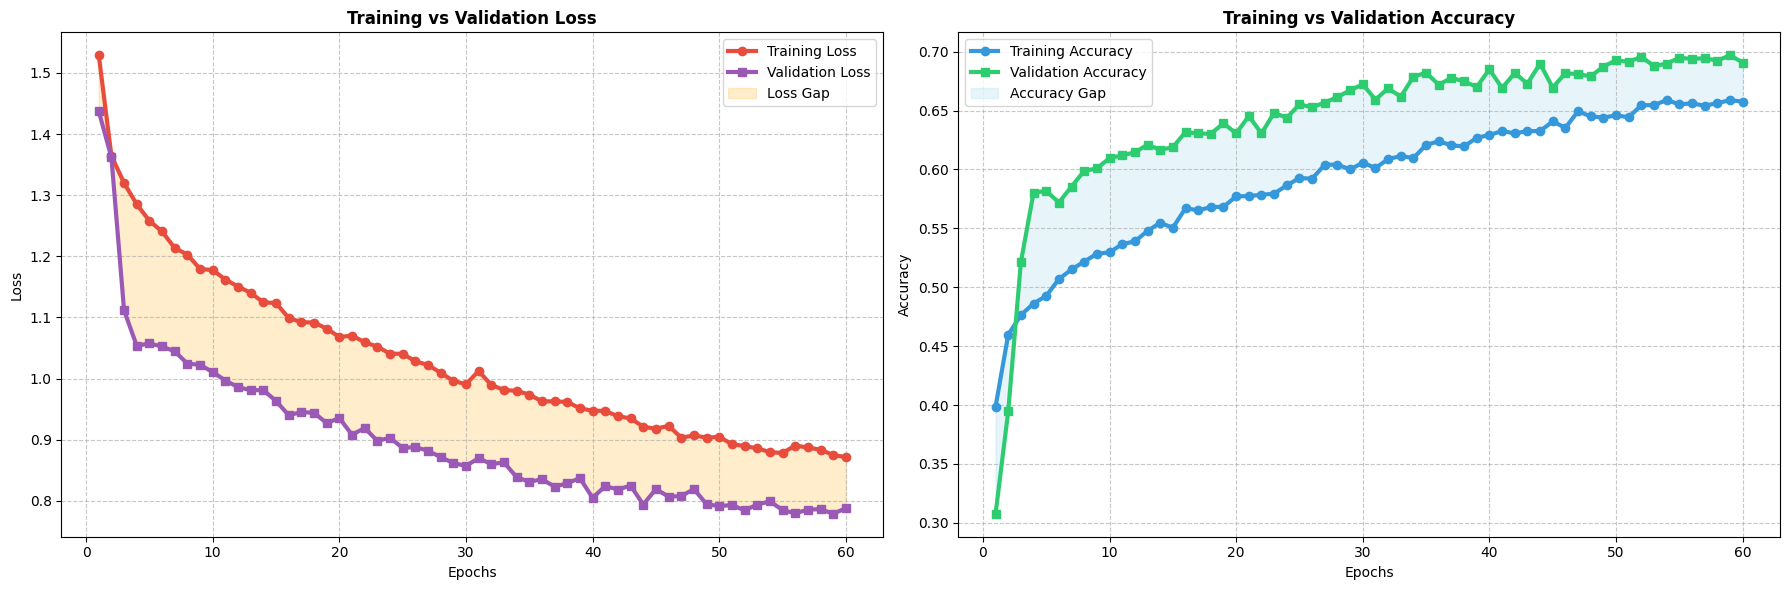

In [55]:
epochs = np.arange(1, len(history_D.history['loss']) + 1)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Loss: training vs validation
axs[0].plot(epochs, history_D.history['loss'], '#e74c3c', linewidth=3, marker='o', label='Training Loss')
axs[0].plot(epochs, history_D.history['val_loss'], '#9b59b6', linewidth=3, marker='s', label='Validation Loss')
axs[0].fill_between(epochs, history_D.history['loss'], history_D.history['val_loss'], color='orange', alpha=0.2, label='Loss Gap')
axs[0].set_title('Training vs Validation Loss', fontsize=12, fontweight='bold')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='best')
axs[0].grid(True, linestyle='--', alpha=0.7)

# Accuracy: training vs validation
axs[1].plot(epochs, history_D.history['accuracy'], '#3498db', linewidth=3, marker='o', label='Training Accuracy')
axs[1].plot(epochs, history_D.history['val_accuracy'], '#2ecc71', linewidth=3, marker='s', label='Validation Accuracy')
axs[1].fill_between(epochs,history_D.history['accuracy'], history_D.history['val_accuracy'], color='skyblue', alpha=0.2, label='Accuracy Gap')
axs[1].set_title('Training vs Validation Accuracy', fontsize=12, fontweight='bold')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='best')
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 📊 Model Performance Comparison

We used Plotly to visualize the training results of four models by plotting **Validation Accuracy** and **Validation Loss** over epochs.

---

#### 🧩 Setup:
- **Models**: `A_model`, `B_model`, `CCC_model`, `D_model`
- **Metrics**: `val_accuracy` (solid lines), `val_loss` (dashed lines)
- **Tool**: `plotly.graph_objects` + `make_subplots`

---

#### 🎨 Colors:
| Model      | Color   |
|------------|---------|
| A_model    | 🔴 Red   |
| B_model    | 🟢 Green |
| CCC_model  | 🔵 Blue  |
| D_model    | 🟠 Orange|

---

#### 📈 Plot Details:
- **Left**: Validation Accuracy
- **Right**: Validation Loss
- Shared x-axis (epochs) for clear comparison

---

#### ✅ Key Insights:
- Visualizes generalization and training stability
- Helps identify best-performing model by accuracy and loss trends


In [112]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

histories = [history_A, history_B, history_C, history_D]
labels = ['A_model', 'B_model', 'CCC_model', 'D_model']
colors = ['red', 'green', 'blue', 'orange']

fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=['📈 Validation Accuracy', '📉 Validation Loss'], 
                    shared_xaxes=True)

for i, history in enumerate(histories):
    fig.add_trace(go.Scatter(
        y=history.history['val_accuracy'],
        mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=3)
    ), row=1, col=1)

for i, history in enumerate(histories):
    fig.add_trace(go.Scatter(
        y=history.history['val_loss'],
        mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=3, dash='dot')
    ), row=1, col=2)

fig.update_layout(
    title={'text': '🚀 Model Performance Comparison (Validation Accuracy vs. Loss)', 
           'x': 0.5, 'xanchor': 'center', 'y': 0.95},
    xaxis_title='Epoch',
    yaxis_title='Accuracy',
    template='plotly_white',
    width=1120,  
    height=500   
)

fig.show()

### 🖼️ Model A – Predictions

Visualizing the top predictions for 6 randomly selected test images.  
Each image is displayed alongside its predicted classes in a pie chart, highlighting the model's confidence in the predictions.


1/1 [==============================] - 0s 39ms/step


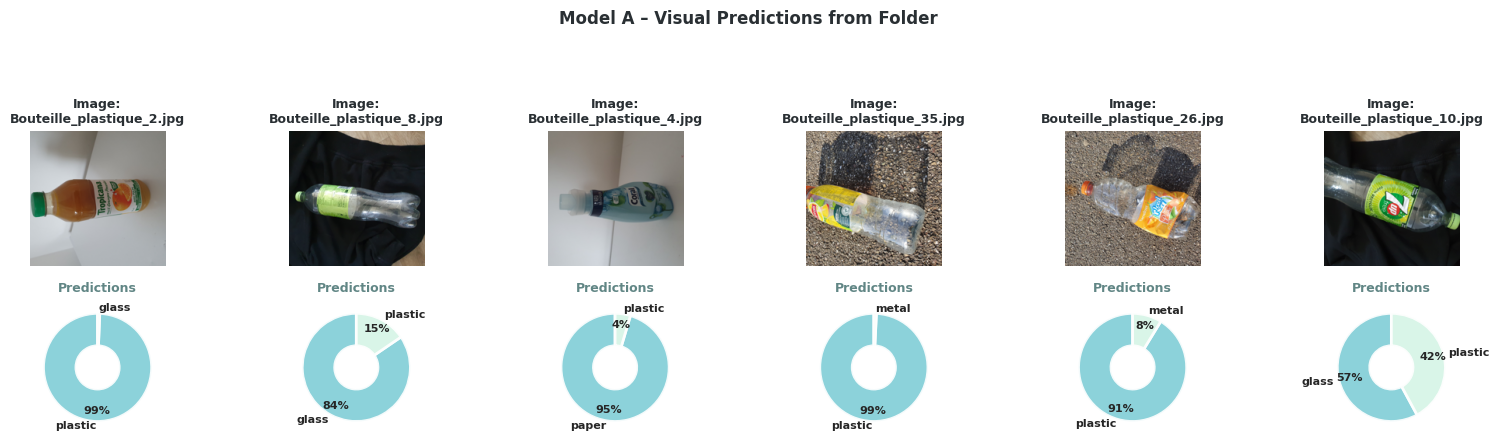

In [176]:
folder_path = r'D:\dataset\archive5\1024+\test\Bouteille_plastique' 

img_size = (175, 175)  

all_images = []
image_names = []

for file in os.listdir(folder_path):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(folder_path, file)
        img = Image.open(img_path).resize(img_size)
        img = np.array(img) / 255.0   
        all_images.append(img)
        image_names.append(file)

all_images = np.array(all_images)

indices = random.sample(range(len(all_images)), 6)
sample_images = all_images[indices]
sample_names = [image_names[i] for i in indices]

predictions = A_model.predict(sample_images)

fig, axes = plt.subplots(2, 6, figsize=(16, 4))
plt.subplots_adjust(wspace=0.3, hspace=0.6)
fig.patch.set_facecolor('white')

colors = ['#80ced6', '#d5f4e6']

for i in range(6):
    img = sample_images[i]
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'Image:\n{sample_names[i]}', fontsize=9, fontweight='bold', color='#292F33')
    axes[0, i].axis('off')

    pred = predictions[i]
    top = np.argsort(pred)[::-1][:2]
    sizes = [pred[j] * 100 for j in top]
    labels = [class_names[j] for j in top]

    wedges, _, autotexts = axes[1, i].pie(
        sizes,
        labels=labels,
        colors=[colors[0], colors[1]],
        autopct=lambda p: f'{int(p)}%' if p >= 1 else '',
        startangle=90,
        wedgeprops=dict(width=0.6, edgecolor='white', linewidth=2),
        textprops={'fontsize': 8, 'fontweight': 'bold'},
        pctdistance=0.8,
        labeldistance=1.09
    )

    for w in wedges:
        w.set_alpha(0.9)
    axes[1, i].set_title('Predictions', fontsize=9, fontweight='bold', color='#618685')

plt.suptitle('Model A – Visual Predictions from Folder', fontsize=12, fontweight='bold', color='#292F33', y=1.1)
plt.tight_layout()
plt.show()


### 🚀 Conclusion

The project has been successfully completed, showcasing the application of deep learning techniques in image classification. Through comprehensive model development, training, and evaluation, the solution demonstrated promising results and provided valuable insights into model performance. The utilization of advanced techniques such as data augmentation and visualization methods has enhanced the understanding of model predictions.

While the current implementation achieved solid performance, future improvements could focus on further optimization of the model, including experimenting with more complex architectures and fine-tuning hyperparameters. Additionally, real-time deployment and integration into practical applications will be explored to fully leverage the potential of the model.

This project serves as a strong foundation for future work and sets the stage for more scalable and efficient machine learning solutions in the field of image classification.

### 🔍 Future Work:
- Model optimization for better accuracy and efficiency.
- Real-time deployment and integration in real-world applications.
- Exploration of additional datasets to improve generalization.

The experience gained through this project will be invaluable for tackling future challenges in AI and machine learning.
